In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

CONFIDENCE INTERVALS

EXERCISE 1. What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [38]:
xbar = 98.25

In [39]:
sigma = 0.73

In [40]:
n = 130

In [41]:
#standard error of sample mean
# with pandas: df.sem()

sem = sigma / np.sqrt(n)
sem

0.06402523540941313

In [42]:
#Confidence Interval using Normal Distribution

stats.norm.interval(alpha=0.99, 
                    loc=xbar, 
                    scale=sem)

(98.08508192246582, 98.41491807753418)

In [43]:
#Confidence Interval using t Distribution

stats.t.interval(alpha=0.99, 
                 df=n-1, 
                 loc=xbar, 
                 scale=sem)   #good job, almost same!

(98.08260738705933, 98.41739261294067)

EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [44]:
xbar = 5.4
sigma = 3.1
n = 500

In [45]:
sem = sigma / np.sqrt(n)

In [46]:
#Confidence Interval using Normal Distribution

stats.norm.interval(alpha=0.95, 
                    loc=xbar,
                    scale=sem)

(5.12827801242126, 5.67172198757874)

In [47]:
#Confidence Interval using t Distribution

stats.t.interval(alpha=0.95, 
                 df=n-1, 
                 loc=xbar, 
                 scale=sem)

(5.127617354510309, 5.672382645489692)

HYPOTHESIS TESTING

EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [48]:
mu = 13.20  #H0

xbar = 12.20  #H1
n = 40
sigma = 2.50

alpha = 0.05

In [49]:
sem = sigma / np.sqrt(n)

In [50]:
sem = sigma / np.sqrt(n)

In [51]:
stats.norm.interval(alpha=0.01,
                   loc=xbar,
                   scale=sem)

(12.195045711171279, 12.20495428882872)

In [52]:
z = (xbar - mu) / (sigma/np.sqrt(n))
z

-2.5298221281347035

In [53]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [54]:
p_value = stats.norm.cdf(xbar, mu, sigma/np.sqrt(n))
p_value

0.005706018193000826

In [55]:
if p_value < alpha:
    print('At {} level of significance, \
we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, \
we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


EXERCISE 4. Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [77]:
soil = pd.read_csv("soil - Sheet1.csv")
soil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [89]:
soil.Soil1.fillna(soil.Soil1.mean(), inplace=True)

In [90]:
soil

,Soil1,Soil2
0,1.4420,1.364
1,1.9430,1.878
2,1.1100,1.337
3,1.9120,1.828
4,1.5530,1.371
5,1.6410,1.428
6,1.4990,1.119
7,1.3470,1.373
8,1.6850,1.589
9,1.5780,1.714


In [91]:
pairedtest = stats.ttest_rel(soil.Soil1, soil.Soil2)
pairedtest

Ttest_relResult(statistic=5.7642764772728405, pvalue=1.7431504857227526e-06)

EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics).

World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [215]:
pisa.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [217]:
pisa.shape

(70, 6)

In [84]:
pisa = pd.read_csv("2015 PISA Test - Sheet1.csv")
pisa

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [116]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [209]:
crosstab = pd.crosstab(pisa.Continent_Code, pisa.Math)
crosstab

Math,359.6062,366.8180,371.3114,377.0695,380.2590,386.1096,386.5606,389.6438,396.2497,402.4007,...,511.0876,512.2528,519.5291,521.2506,524.1062,531.2961,532.4399,543.8078,547.9310,564.1897
Continent_Code,,,,,,,,,,,,,,,,,,,,,
AF,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AS,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,1,1,1,1,1,1
EU,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
OC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
from scipy.stats import chi2_contingency

In [210]:
stat, p, dof, expected = chi2_contingency(crosstab)

In [211]:
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('stat=%.3f, p=%.4f' % (stat, p))

stat=260.000, p=0.4187


In [212]:
if p > 0.05:
	print('Fail to reject Ho')
else:
	print('We reject the null hypothesis. Gender and survived variables are dependent')

Fail to reject Ho


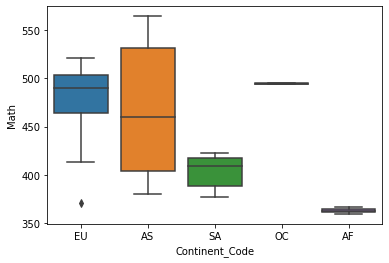

In [213]:
sns.boxplot(pisa, x="Continent_Code", y="Math");